# Capítulo 2: Housing

Esse capítulo descreve um exemplo de projeto de ponta a ponta, que trata de um algoritmo de classificação para uma empresa imobiliária. Etapas a serem seguidas nesse projeto:

##### Entendendo o problema

1. Analisar o contexto e o problema.
2. Obter os dados com os quais trabalharemos.
3. Identificar e visualizar os dados para reunir informações úteis.

##### Limpeza e extração

4. Preparar os dados para os algoritmos de ML.

##### Implementação

5. Selecionar um algoritmo adequado para a tarefa e treiná-lo.

##### Evolução e manutenção

6. Aperfeiçoar o modelo.
7. Apresentar a solução.
8. Disponibilizar em produção, monitorar e fazer manutenção do sistema.


### Trabalhe com dados do mundo real

Dados fictícios costumam não mostrar como realmente dados reais chegam até o analista, engenheiro ou cientista de dados. Além disso, frequetemente não se encontram conhecimentos ou eles são facilmente encontrados nesses dados, o que não gera um aprendizado de como realmente procurar por relações valiosas em dados. Felizamente, existem muitas bases de dados "do mundo real" disponíveis online. Elas podem ser encontradas em sites como:

* Kaggle - https://www.kaggle.com/datasets
* UC Irvine ML Repository - https://archive.ics.uci.edu/ml
* AWS (Amazon) - https://registry.opendata.aws/
* Data Portals - https://dataportals.org/


# Analisando o Panorama Geral

O conjunto de dados com o qual será trabalhado trata de preços de imóveis na Califórnia, em 1990. O objetivo é criar um modelo que possa prever o preço médio de imóveis em qualquer região da Califórnia, considerando os atributos da base de dados.


### Abordar o problema

É necessário saber qual é o propósito do modelo que será criado.

> "Como a empresa espera usar e se beneficiar desse modelo? Saber isso é importante, pois estabelecerá de que forma você aborará o problema, quais algoritmos escolherá, qual indicador de desempenho utilizará para avaliar seu modelo e **quanto de esforço será empreendido para refinar o modelo**" (p. 31)

No nosso caso fictício, os resultados do nosso modelo alimentarão um outro¹ responsável por analisar se vale a pena ou não investir em determinada região. Já que isso interfere no faturamento, fazer tudo certo é fundamental.

_¹ Isso chama-se Pipeline. Os resultados de um modelo são armazenados em um data store que alimentará outro, e assim consecutivamente._


Assim como é importante saber o futuro do projeto (o que faremos), é necessário saber o seu passado, isto é,

> "**Como é a solução atual (caso exista)?** Geralmente, a situação atual lhe dá uma ideia do desempenho, e até informações úteirs sobre como resolver o problema" (p.31)

Neste exemplo, a solução anterior era consultar especialistas - que frequentemente forneciam estimativas não muito precisas.

Com essas informações, podemos começar a tomar decisões sobre o projeto. Qual tipo de algoritmo iremos usar? Que tarefa de Aprendizado de Máquina realizaremos? Etc.
Como temos dados rotulados de treinamento, iremos utilizar um algoritmo **supervisionado**. Mais especificamente, realizaremos a tarefa de **regressão**, já que devemos estimar um valor.


### Escolha uma medida de desempenho

Uma medida muito popular para regressão é a Raiz do Erro Quadrado Médio (RMSE). _"Ela dá uma ideia da quantidade de erros gerados pelo sistema, com um peso maior para grandes erros"_.

##### Calculando o RMSE

Seja `X` uma matriz de vetores `x[i]` transpostos. Então `X = { x[1], x[2], ..., x[m] }`, onde cada `x[i]` representa uma instância (não rotulada), e `m` é o número de instâncias de `X`, que presenta um conjunto de dados.

Seja `y` o valor do rótulo (que deverá ser previsto) dos dados `x[i]`.

Um exemplo seria uma instância cujo rótulo é um valor igual a 156.400 dólares, e os outros atributos dessa instância são longitude -118,29º, latitude de 33,91º e 1.416 habitante de com uma renda média de 38.372 dólares. Então, teríamos:

`y = 156400`

`x = { -118.29, 33.91, 1416, 38372 }`

Seja `h()` a função preditiva do nosso modelo, sendo que cada `h(x[i]) = y_hat[i]`, onde `y_hat` é o valor estimado pelo nosso modelo.

O valor da RMSE é calculado por:

`RMSE = sqrt( sum( error ** 2 ) / m )`, onde

`error = h(x[i]) - y[i] `<br>
`      = y_hat[i] - y[i]`

Note que o erro é a diferença entre o valor estimado e o valor real. Pelo RMSE, grandes valores desse erro são potencializados ao elevar o erro ao quadrado, enquanto pequenos erros são minimizados. Uma vez que o erro é elevado ao quadrado, a Média dos Erros Quadrados (MSE) é corrigida pela raiz quadrada (RMSE).

Note também que a RMSE nada mais é do que uma média das diferenças entre os valores estimados e os valores reais, ou seja, uma média dos erros (nesse caso, os erros quadrados).

### Verifique as hipóteses

Poderia ser que o objetivo do nosso sistema não fosse saber o preço exato dos imóveis, e sim saber se são "baratos", "médios" ou "caros". Nesse caso, deveríamos fazer uma classificação, e não uma regressão. Se atentar a como os dados serão utilizados é muito importante.

# Obtenha os Dados

In [242]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [243]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [244]:
fetch_housing_data()
housing = load_housing_data()

### Uma rápida olhada na estrutura dos dados

Esquema da tabela:
* Longitude
* Latitude
* Idade média do imóvel
* Total de cômodos
* Total de quartos
* Número da população
* Número de moradores
* Renda média
* Valor médio do imóvel
* Proximidade do mar

In [245]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [246]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Temos alguns campos nulos no atributo `total_bedrooms` (207 instâncias, no total).

Também, temos um único atributo não numérico, que é `ocean_proximity`. Pela rápida olhada no resultado de `.head()` podemos inferir que é um atributo categórico. Vamos eximinar isso com `.value_counts()`, para sabermos quais são os valores que esse atributo contém.

In [247]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Temos um valor com apenas 5 ocorrências. Podemos transformá-lo em algum outro dado, já que 5 instâncias ão terão relevância para o algoritmo.

Vamos ver o que os atributos numéricos nos revelam usando `.describe()`

In [248]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


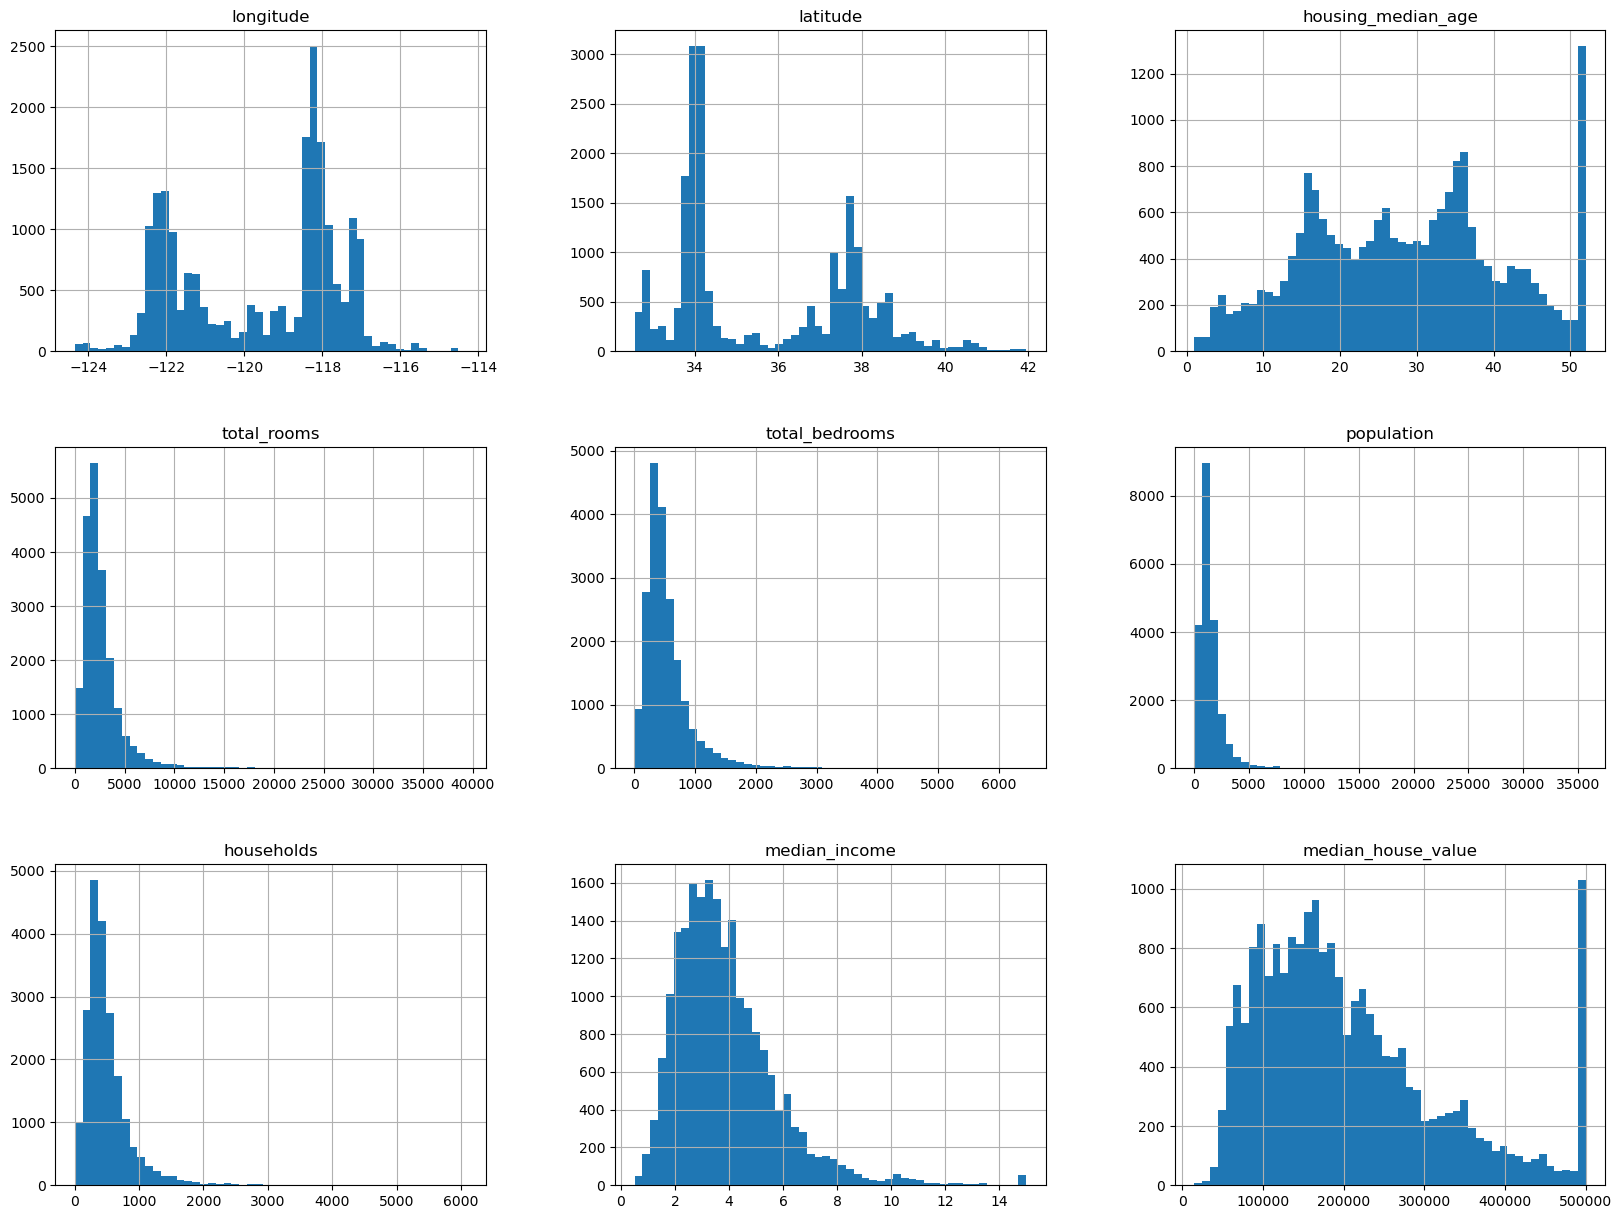

In [249]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))

plt.show()

**Notas:**

1. A renda média da população e o valor médio e a idade média dos imóveis foram limitados superio e inferiomente. Isso pode ou não ser um problema. Para o caso do valor médio, seria necessário verificar com seu chefe ou com o cliente, pois com esses dados, o algoritmo poderia aprender a nunca ultrapassar os limites. Se isso for um porblema, o ideal seria eliminar da base de dados as intâncias que estão nesses extremos.
<br>

2. Os atributos têm escalas muito diferentes. Veja a diferença entre o valor médio (que vai de 0 até 500000) e a longitude (de -124 até -114), por exemplo.
<br>

3. Muitos histogramas possuem dados que se estendem à direita da média. Isso pode dificultar o Aprendizado de Máquina.

### Criando um conjunto de testes

É importante, antes de analisar mais profundamente os dados e realizar modificações neles, separar um conjunto de testes para avaliar o algoritmo posteriormente. Ao fazer isso logo no início, evitamos a possibilidade de nos enviezarmos ao supor quais métodos ou algoritmos melhor se adequariam aos nossos dados.

Para criar um conjunto de testes, poderíamos separar nossos dados baseado em alguma proporção, digamos, 20% dos dados para teste, e o resto para treino:

In [250]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Mas digamos que, conversando com especialistas, você descubra que a renda média é um atributo muito importante para a estimativa do valor médio. Para gerar um algoritmo com estimativas confiáveis, seria necessário treinar o modelo um conjunto de dados que fosse bastante representativo: aí é necessária uma amostragem estratificada. Vamos criar estratos para o nosso atributo:

In [251]:
import numpy as np

housing['income_category'] = pd.cut(housing['median_income'],
                                    bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels = [1, 2, 3, 4, 5])

O método `pandas.cut()` nos serve para criar um atributo categórico que permitirá visualizar os estratos da renda média.

<Axes: >

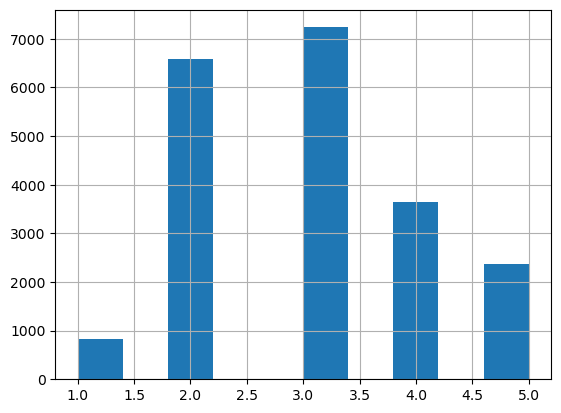

In [252]:
housing['income_category'].hist()

Para criar um conjunto de treinamento e de testes que seja representativo, e não tendencioso, vamos utilizar `income_category` para criar conjuntos baseados em amostragem estratificada.

In [253]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,
                               test_size = 0.2,
                               random_state = 42)

for train_index, test_index in split.split(housing, housing['income_category']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Nossas proporções podem ser calculadas por:

In [254]:
strat_test_set['income_category'].value_counts() / len(strat_test_set)

income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

E agora, podemos eliminar nossa coluna acessória `income_category`

In [255]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income_category', axis=1, inplace=True)

# Explore e Visualize os Dados para Obter Informações Úteis

Para continuar, vamos fazer uma cópia do conjunto de treinamento:

In [256]:
housing = strat_train_set.copy()

### Visualizando dados grográficos

Use o método `plot()` para plotar gráficos

- `kind`: tipo do gráfico
- `alpha`: diferentes opacidades de acordo com a densidade dos dados
- `s`: raio dos pontos, de acordo com os valores de uma coluna
- `c`: coloração dos pontos, de acordo com os valores de uma coluna
- `cmap`: jogo de cores utilizado pelo gráfico

<Axes: xlabel='longitude', ylabel='latitude'>

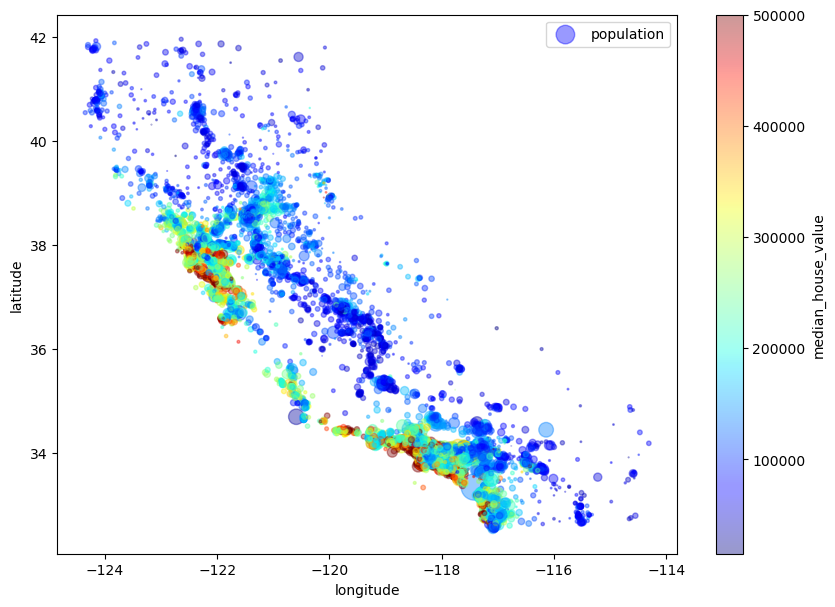

In [257]:
housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, c='median_house_value',
            figsize=(10,7), label='population', cmap=plt.get_cmap('jet'))

### Matriz de Correlação

Podemos calcular o coeficiente de correlação de Pearson para cada par de atributos, reunindo-os numa matriz de correlação

In [258]:
housing_numeric = housing.drop('ocean_proximity', axis=1)

In [259]:
corr_matrix = housing_numeric.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Quanto mais próximo de 1, maior a correlação linear entre os atributos do par. Quanto mais próximo de -1, maior a correlação negativa entre eles. Quanto mais próximo de zero, menor a correlação de qualquer tipo entre os atributos.

Podemos enxergar isso de modo mais claro com o gráfico abaixo

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

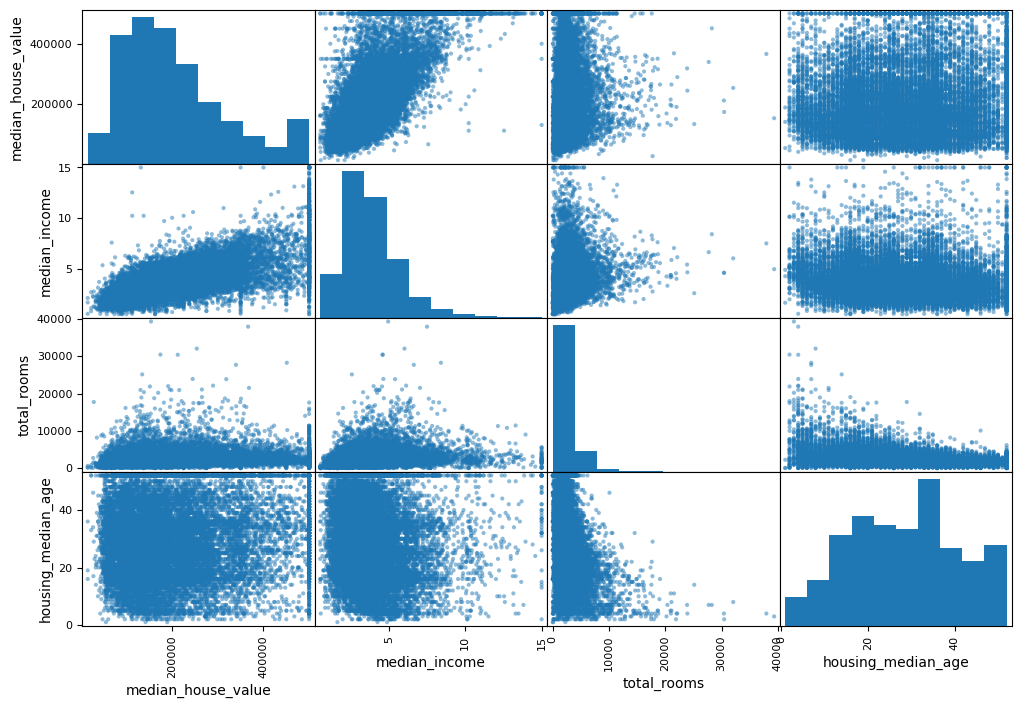

In [260]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

Dado que a correlação de um atributo com ele mesmo é sempre 1, o Pandas troca esse gráfico por um histograma do atributo (que para esses casos, é mais relevante). Outras opções estão disponíveis na documentação do Pandas

# Combinação de Atributos

Frequentemente, atributos isolados não serão relevantes. Mas quando combinados, poderão ser úteis. Vamos testar algumas combinações promissoras:

- Número de cômodos por famílias
- Número de quartos pelo número de cômodos
- População por domicílio

In [261]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

Vamos ver pela matriz de correlação se conseguimos mais algum atributo com correlação linear relevante

In [262]:
housing_numeric = housing.drop('ocean_proximity', axis=1)
corr_matrix = housing_numeric.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Essa etapa de exploração dos dados poderá ser repetida quantas vezes for necessária. Ao conseguir um protótipo funcional, poderá adquirir mais ideias sobre os dados e como eles podem alcançar resultados melhores

# Prepare os Dados para Algoritmos de AM

Vamos começar copiando novamente o conjunto de treinamento

In [263]:
housing = strat_train_set.drop('median_house_value', axis=1) # inplace=False por padrão
housing_labels = strat_train_set['median_house_value'].copy() # crie uma cópia, não passe uma referência

### Limpando os Dados

Atributos com valores nulos são prejudiciais para bons resultados de algoritmos de Machine Learning. Por isso, é necessário adotar estratégias para corrigir esse problema. Três opções:

1. Remover a instância
2. Remover o atributo
3. Preencher o valor nulo

Para as duas primeiras opções, pode-se usar `.drop()` ou `.dropna()`. Para a terceira, pode-se usar `.fillna()`, como abaixo:

```Python
median = housing['total_bedrooms'].median()
housing[total_bedrooms].fillna(median, inplace=True)
```

Mas a ScikitLearn oferece uma classe chamada `SimpleImputer` que se encarrega dos valores nulos.

In [264]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [265]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

O valor de `statistics_` é tão somente a mediana de cada atributo. Com isso, podemos transformar nosso conjunto de dados

In [266]:
X = imputer.transform(housing_num) # retorna um array Numpy
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Manipulando texto e atributos categóricos

Vamos analisar quais são os valores do nosso atributo categórico

In [267]:
housing_cat = housing[['ocean_proximity']]
# note que isso é uma lista com apenas um elemento. Isso faz com que housing_cat seja um pd.DataFrame, e não um pd.Series

housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [268]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

Vamos transformar esse atributo categórico em um atributo número, já que existe um número limitado de opções para `ocean_proximity`. Para isso, poderíamos considerar dois casos:

##### 1. O atributo é categórico ordinal

Nesse caso, existe um ordenamento como "muito ruim", "ruim", "bom", "muito bom". Para esses casos, podemos transformar esses valores em uma sequência numérica como 0, 1, 2, 3. A classe `OrdinalEncoder` do ScikitLearn dá conta disso:

*Input:*
```Python
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:5]
```
*Output:*
```
array([[0.]
       [4.]
       [2.]
       [1.]
       [2.]])
```

Verifique o ordenamento com o atributo `categories_` do encoder:

```Python
ordinal_encoder.categories_
```

##### 2. O atributo é categórico nominal

Nesse caso, os atributos não são ordenados, apenas descrevem coisas diferentes. O atributo `ocean_proximity`, por exemplo, descreve coisas diferentes que não estão ordenadas, como `NEAR_BAY` e `NEAR_OCEAN`. Por isso, usaremos o `OneHotEncoder`. Esse encoder criará um atributo _falso_ (_dummy_) para cada opção. Sempre que a opção estiver presente no atributo, receberá o valor 1, caso contrário, o valor será 0.

In [269]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Essa é uma matriz esparsa SciPy. Como estamos lidando com uma matriz cheia de 0's e 1's, ela ajuda a otimizar o espaço ocupado na memória. Para ver essa matriz tal como ela é, use o método `toarray()`

In [270]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Customize os Transformadores

A ScikitLearn permite criar Transformadores personalizados. Basta criar os métodos para `fit()`, `transform()` e `fit_transform()`. O último pode ser adquirido acrescentando `TransformerMixin` como classe base. `BaseEstimator` também é uma classe base útil, já que facilita a alteração de hiperparâmetros por meio dos métodos `get_params()` e `set_params()`.

Vamos criar um Transformador que adiciona os atributos combinados que testamos anteriormente. (Veja [Combinação de Atributos](#Combinação-de-Atributos)).

In [271]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        # não use *args ou **kargs por causa do BaseEstimator
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None): # nesse caso, não precisamos fazer nada
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [272]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Note a adição do hiperparâmetro `add_bedrooms_per_room`. Ele agiliza o teste de combinações diferentes para alcançar o modelo mais otimizado.

### Escalonamento de características

Quando os atributos possuem escalas muito diferentes, é importante tornar a escalonar os atributos. Por exemplo, se um atributo varia de 5 a 15 e outro varia de -500 a 1500.

Existem duas formas de escalonar valores:

#### 1. Normalização (min-max)

Subtrai o mínimo e divide pelo máximo. Isso faz com que o valor máximo seja 1 e o mínimo seja 0. Portanto, todos os valores vaão variar de 0 a 1.

> Ilustração: imagine um gráfico de função sendo arrastado até que sua ponta esquerda encoste no eixo Y. Depois, esse gráfico é diminuído até que sua ponta esquerda atinja o valor 1.

O problema desse método é que outliers podem afetar significativamente o resultado. Por exemplo, se um valor deveria variar de 0 a 15, o valor 15 deveria ser escalonado para 1. Mas se houver, seja outlier ou ruído, um valor 100, o valor 15 será escalonado para 0.15.

A Scikit-Learn oferece a classe `MinMaxScaler` para isso.

#### 2. Padronização

Subtrai a média e divide pelo desvio-padrão. Não necessariamente o valor vai variar de 0 a 1, o que pode ser problemático.

> Ilustração: imagine um gráfico de função sendo arrastado até que sua média se alinhe com o eixo Y. Depois, esse gráfico pe diminuído até que o desvio-padrão seja igual a 1 (unitário).

A Scikit-Learn oferece a classe `StandardScaler` para isso.

In [273]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_num_scaled = scaler.fit_transform(housing_num)

In [274]:
df_housing_num_scaled = pd.DataFrame(housing_num_scaled, columns=housing_num.columns, index=housing_num.index)
df_housing_num_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.635123,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.775677,0.533612,0.721318,1.292168
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545045,-0.674675,-0.524407,-0.525434
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.038567,-0.467617,-0.037297,-0.865929
20496,0.437431,-0.635818,-0.131489,0.427179,0.269198,0.374060,0.220898,0.325752
...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.686854,0.543471,1.341519,0.637374
12661,-0.921368,1.342761,-1.085806,2.468471,2.149712,3.002174,2.451492,-0.557509
19263,-1.570794,1.310018,1.538566,-0.895802,-0.894007,-0.862013,-0.865118,-0.365475
19140,-1.560803,1.249211,-1.165333,0.249005,0.109257,-0.189747,0.010616,0.168261


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

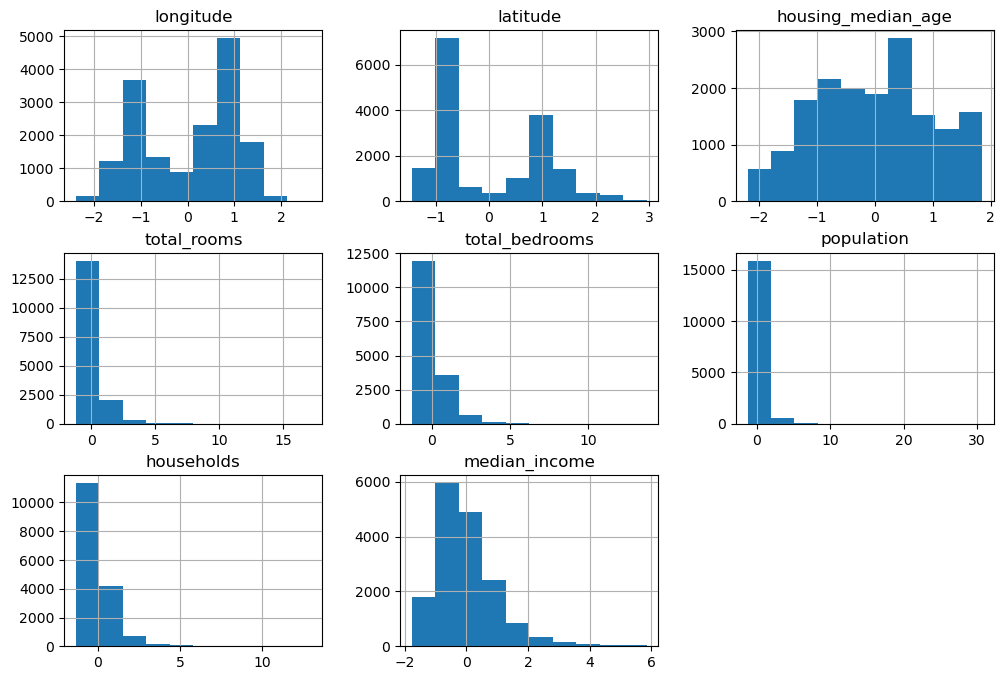

In [275]:
df_housing_num_scaled.hist(figsize=(12, 8))

Veja no eixo X como a escala dos valores mudou: agora variam de -2 a 2, ou de -1 a 3, e por aí vai...

Veja também que `population` não se adequaria bem se usássemos `MinMaxScaler`, por causa dos seus outliers

### Pipelines

Existem muitas transformações a se realizar na hora de preparar os dados. Por isso, a Scikit-Learn oferece a classe `Pipeline`, para juntar tudo em um só lugar e ajudar a organizar e testar combinações.

In [276]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [277]:
num_pipeline['imputer']

SimpleImputer(strategy='median')

In [278]:
num_pipeline['attribs_adder']

CombinedAttributesAdder()

In [279]:
num_pipeline['std_scaler']

StandardScaler()

In [280]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attribs_adder', CombinedAttributesAdder()),
                ('std_scaler', StandardScaler())])

Vamos unir a transformação dos atributos numéricos e categóricos em uma só classe usando o Column Transformer.

O `ColumnTransformer` da Scikit-Learn permite que as colunas de um conjunto de dados sejam transformadas de forma separada:

In [281]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

type(housing_prepared)

numpy.ndarray

In [282]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinedAttributesAdder()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [283]:
pd.DataFrame(housing_prepared, index=housing.index)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.466353,-0.092580,-0.443846,1.0,0.0,0.0,0.0,0.0
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.050362,0.023024,-0.516065,0.0,1.0,0.0,0.0,0.0
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.509240,-0.037436,0.322869,1.0,0.0,0.0,0.0,0.0
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.328149,-0.059156,-0.457023,1.0,0.0,0.0,0.0,0.0


> Veja as colunas numéricas transformadas (0 a 10): elas possuem uma escala mais próxima uma das outras.
> 
> As colunas 11 a 15 mostram o resultado da transformação da coluna `ocean_proximity` pelo
One Hot Encoder 

# Escolha e treine um modelo

### 1. Regressão Linear

In [209]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(
    housing_prepared, # X
    housing_labels    # Y
)

LinearRegression()

In [210]:
lin_housing_predictions = lin_reg.predict(housing_prepared)

In [211]:
lin_housing_predictions

array([ 85657.90192014, 305492.60737488, 152056.46122456, ...,
       220683.15054463, 238863.55319782,  98197.80203821])

In [212]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(
    lin_housing_predictions, # predict
    housing_labels       # actual
)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018743

Isso significa que a raíz do Erro Quadrado Médio é de US$ 60.627. É um baita erro, se considerarmos que a média dos imóveis da região variam entre US$ 120.000 e US$ 265.000!

### 2. Regressão de Árvores de Decisão

In [171]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(
    housing_prepared, # X
    housing_labels    # Y
)

DecisionTreeRegressor()

In [172]:
housing_predictions = tree_reg.predict(housing_prepared)

In [173]:
housing_predictions

array([ 72100., 279600.,  82700., ..., 140400., 258100.,  62700.])

In [174]:
tree_mse = mean_squared_error(
    housing_predictions, # predict
    housing_labels       # actual
)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Droga, sobreajuste dos dados. Vamos usar outra métrica para avaliar o modelo

### Validação cruzada

Vale notar que a validação cruzada, na Scikit-Learn, age com base numa função de utilidade (quanto maior o valor, melhor), e não numa função de erro(quanto menor o valor, melhor). Portanto a estratégia abaixo será usar o MSE negativo, e depois calcular o RMSE invertendo o valor de `scores`

In [175]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg, # model
    housing_prepared, # X
    housing_labels, # Y
    scoring = 'neg_mean_squared_error', # strategy
    cv = 10 # number of folds
)

tree_rmse_scores = np.sqrt(-scores)

In [178]:
def display_scores(scores):
    print('Scores    :', scores)
    print('\nMean    :', scores.mean())
    print('\nStd dev :', scores.std())

In [180]:
display_scores(tree_rmse_scores)

Scores    : [72984.2475055  68981.93502537 68371.97254612 71382.38402717
 70906.33975266 77513.53602465 70185.80012449 72930.19530233
 68361.84542323 70305.911709  ]

Mean    : 71192.4167440518

Std dev : 2625.974970729591


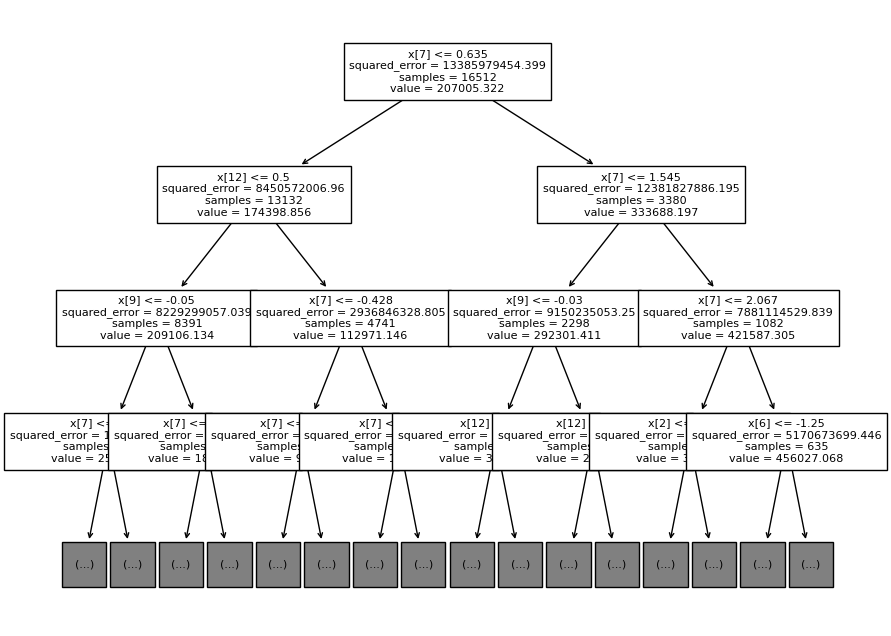

In [197]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(10,8))
plot_tree(tree_reg, max_depth=3, ax=ax, fontsize=8)
plt.show()

Um resultado ruim, dado que a média dos RMSE é um erro de US$ 71.192. Isso parece até pior que o modelo da Regressão Linear. Vamos verificar:

In [181]:
lin_scores = cross_val_score(
    lin_reg, # model
    housing_prepared, # X
    housing_labels, # Y
    scoring = 'neg_mean_squared_error', # strategy
    cv = 10 # number of folds
)

lin_rmse_scores = np.sqrt(-scores)

In [182]:
display_scores(lin_rmse_scores)

Scores    : [72984.2475055  68981.93502537 68371.97254612 71382.38402717
 70906.33975266 77513.53602465 70185.80012449 72930.19530233
 68361.84542323 70305.911709  ]

Mean    : 71192.4167440518

Std dev : 2625.974970729591


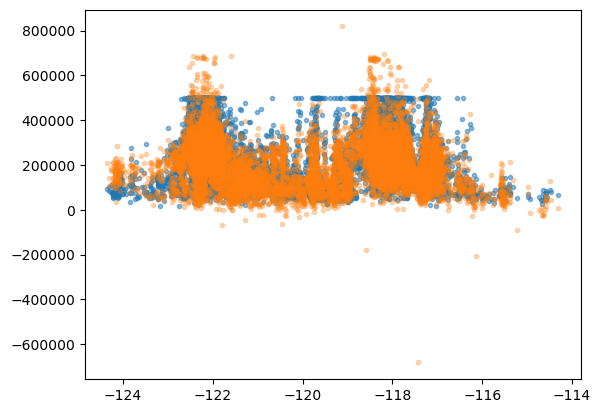

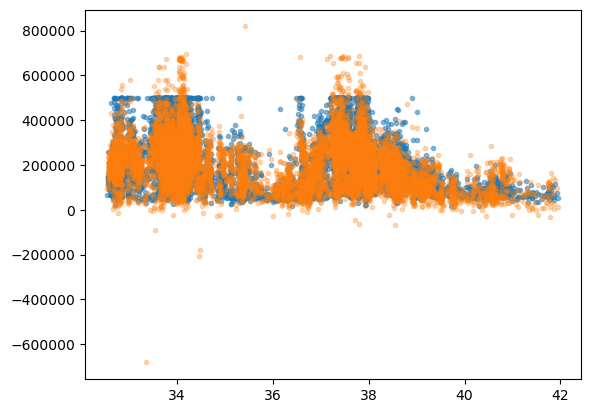

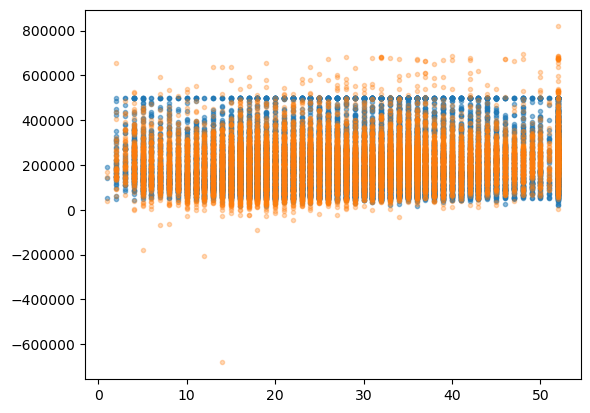

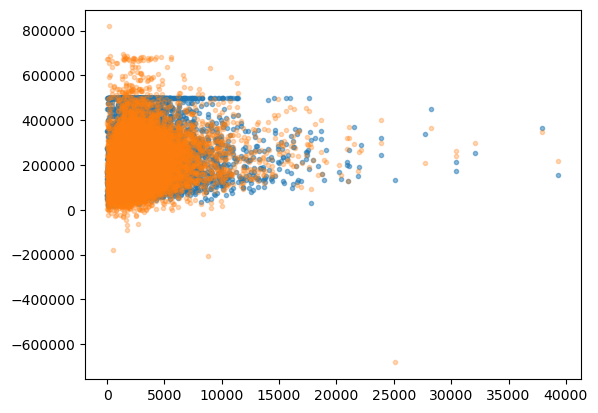

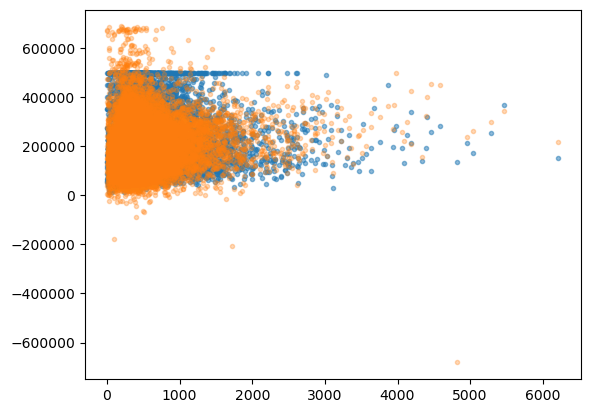

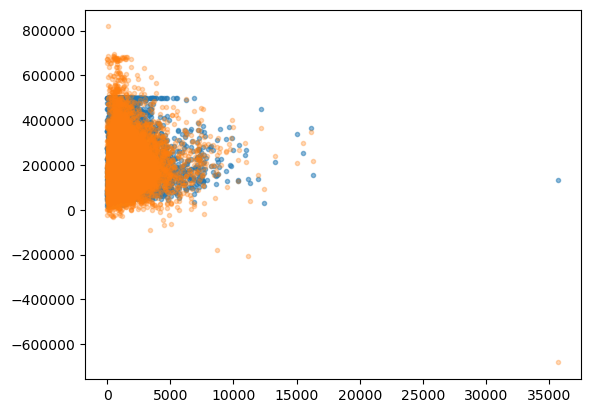

In [220]:
for i in range(6):
    plt.figure()
    plt.subplot(1,1,1)
    x = housing[housing.columns[i]]
    plt.scatter(x, housing_labels, alpha=0.5, marker='.')
    plt.scatter(x, lin_housing_predictions, alpha=0.3, marker='.')

plt.show()

### 3. Regressor de Floresta Aleatória

In [285]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(
    housing_prepared,
    housing_labels
)

RandomForestRegressor()

In [286]:
housing_predictions = forest_reg.predict(housing_prepared)
housing_predictions

array([ 76908., 295293.,  84579., ..., 154419., 241962.,  69600.])

In [287]:
forest_mse = mean_squared_error(
    housing_predictions, # predict
    housing_labels       # actual
)

forest_rmse = np.sqrt(forest_mse)
forest_rmse

18746.635920094417

In [240]:
scores = cross_val_score(
    forest_reg, # model
    housing_prepared, # X
    housing_labels, # Y
    scoring = 'neg_mean_squared_error', # strategy
    cv = 10 # number of folds
)

forest_rmse_scores = np.sqrt(-scores)

In [ ]:
display_scores(scores)

# Aperfeiçoe seu modelo

Podemos usar o `GridSearchCV` para testar várias combinações de parâmetros de uma vez:

In [289]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [2, 4, 6, 8]
    },
    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2, 3, 4]
    }
]

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5, # usa cross validation para achar os melhores parâmetros
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [290]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [292]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

### Analise seus melhores modelos e seus erros

In [297]:
features_importances = grid_search.\
    best_estimator_.\
        feature_importances_

features_importances

array([7.10348113e-02, 6.88194097e-02, 4.42642376e-02, 1.74704016e-02,
       1.78661737e-02, 1.79900983e-02, 1.62640765e-02, 3.61880626e-01,
       4.98211649e-02, 1.08034638e-01, 7.52494871e-02, 1.17214933e-02,
       1.33678670e-01, 3.17916033e-05, 2.25144493e-03, 3.62147492e-03])

In [328]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedroom_per_hhold"]

cat_encoder = full_pipeline.named_transformers_['cat'] # OneHotEncoder
cat_one_hot_attribs = cat_encoder.categories_[0] # list of attributes generated by One Hot

attributes = num_attribs + extra_attribs + cat_one_hot_attribs.tolist()

pair_list = sorted(zip(features_importances, attributes), reverse=True)

for pair in pair_list:
    print("{:18} : {}".format(pair[1], pair[0]))

median_income      : 0.36188062644418534
INLAND             : 0.13367867009231643
pop_per_hhold      : 0.10803463813986806
bedroom_per_hhold  : 0.07524948709204542
longitude          : 0.07103481127209553
latitude           : 0.0688194096612028
rooms_per_hhold    : 0.04982116491764173
housing_median_age : 0.04426423759361802
population         : 0.017990098291345184
total_bedrooms     : 0.01786617366415045
total_rooms        : 0.01747040159793788
households         : 0.0162640764755397
<1H OCEAN          : 0.011721493304110266
NEAR OCEAN         : 0.0036214749176452623
NEAR BAY           : 0.002251444932974931
ISLAND             : 3.179160332302178e-05


Parece que a coluna `INLAND` é a única realmente importante em `ocean_proximity`

In [390]:
data = housing_prepared.copy()
data_df = pd.DataFrame(data, columns=attributes, index=housing.index)

In [391]:
sorted_attribs = []
for x in pair_list: sorted_attribs.append(x[1])
unneces_attribs = sorted_attribs[sorted_attribs.index('<1H OCEAN'):]
unneces_attribs

['<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

In [392]:
data_df.drop(unneces_attribs, axis=1, inplace=True)

In [393]:
data_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_hhold,pop_per_hhold,bedroom_per_hhold,INLAND
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,1.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0
2908,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,1.0
14053,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0
20496,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15174,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.466353,-0.092580,-0.443846,0.0
12661,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,0.050362,0.023024,-0.516065,1.0
19263,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.509240,-0.037436,0.322869,0.0
19140,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,0.328149,-0.059156,-0.457023,0.0


In [394]:
forest_reg = RandomForestRegressor()

forest_reg.fit(
    housing_prepared,
    housing_labels
)

RandomForestRegressor()

In [395]:
housing_predictions = forest_reg.predict(housing_prepared)
housing_predictions

array([ 77350.  , 294454.01,  84759.  , ..., 162695.  , 244999.  ,
        72668.  ])

In [396]:
forest_mse = mean_squared_error(
    housing_predictions, # predict
    housing_labels       # actual
)

forest_rmse = np.sqrt(forest_mse)
forest_rmse

18709.27863040588

In [397]:
param_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [2, 4, 6, 8]
    },
    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2, 3, 4]
    }
]

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5, # usa cross validation para achar os melhores parâmetros
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [398]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [399]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}